In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

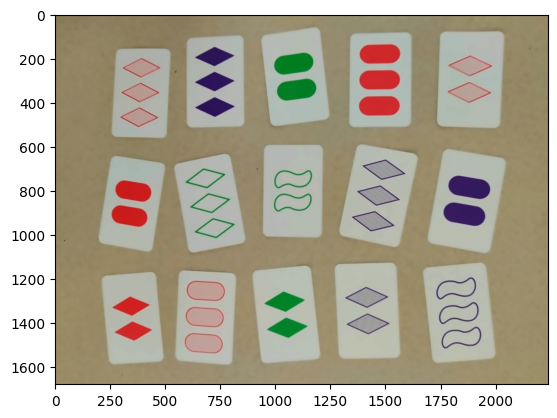

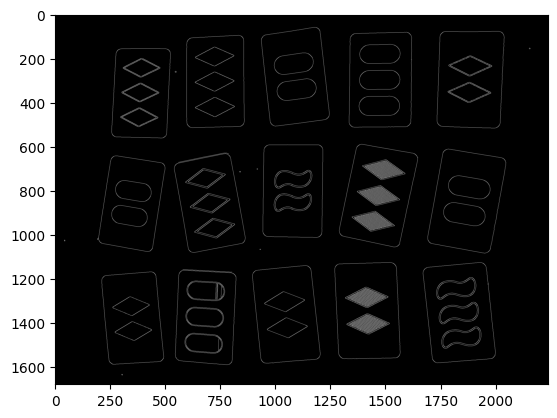

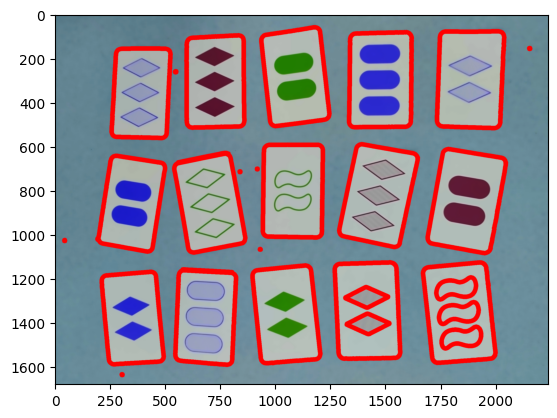

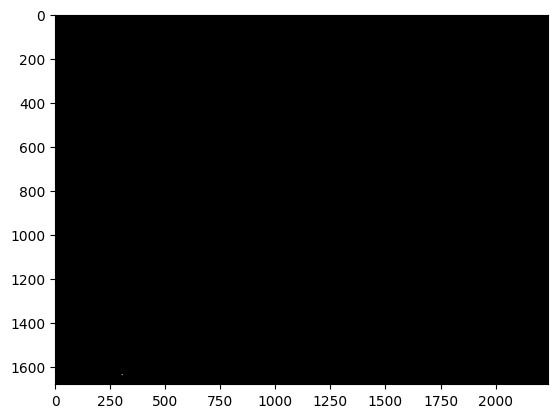

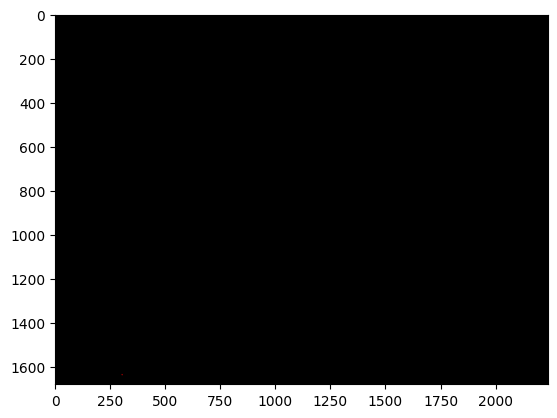

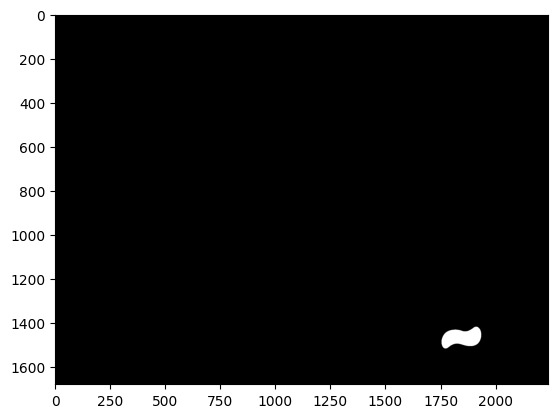

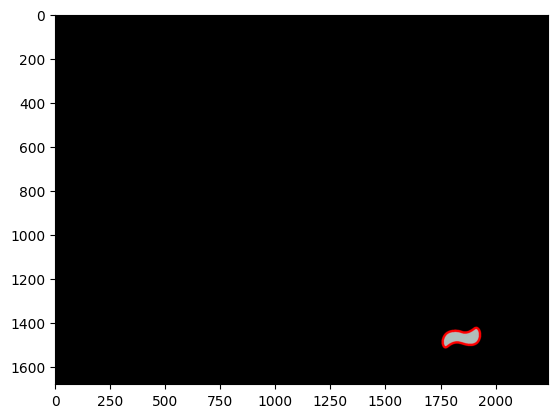

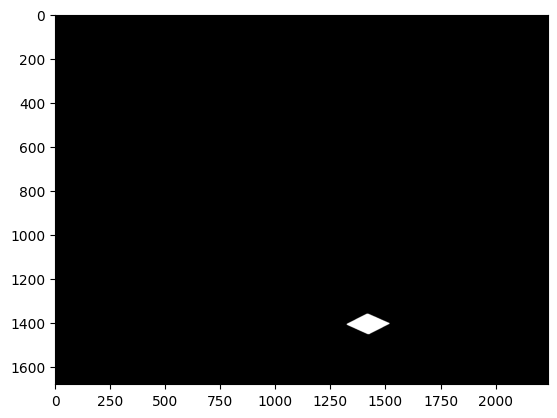

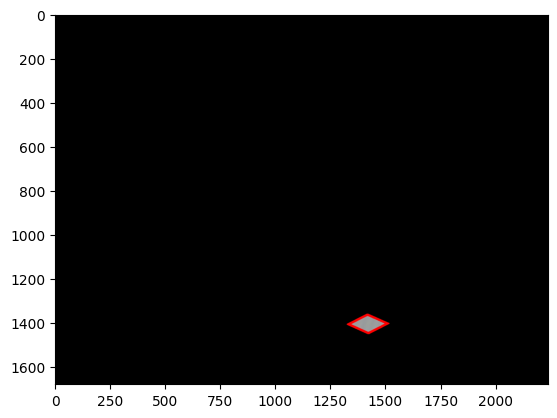

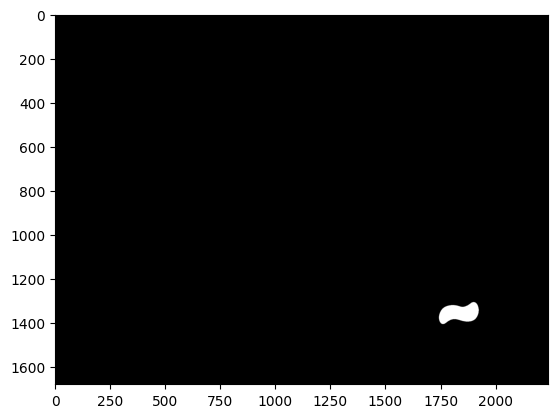

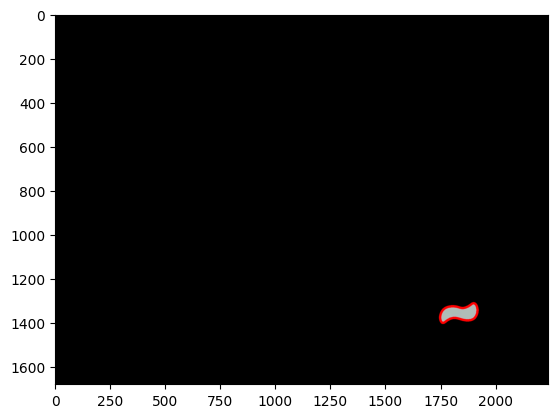

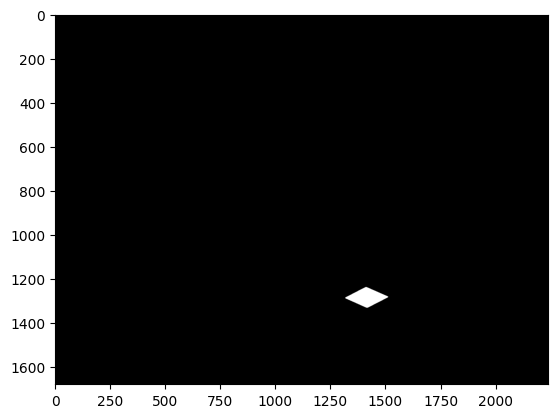

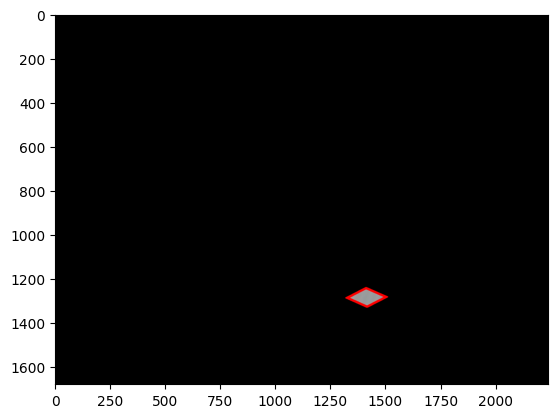

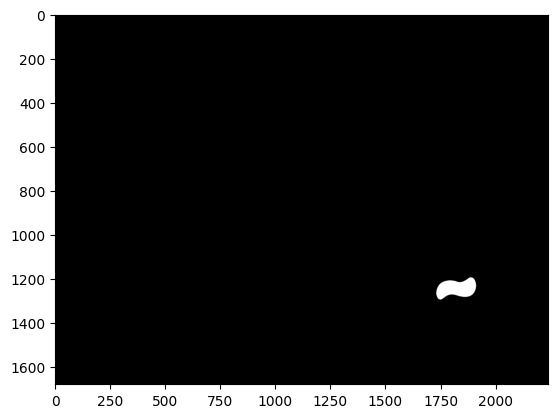

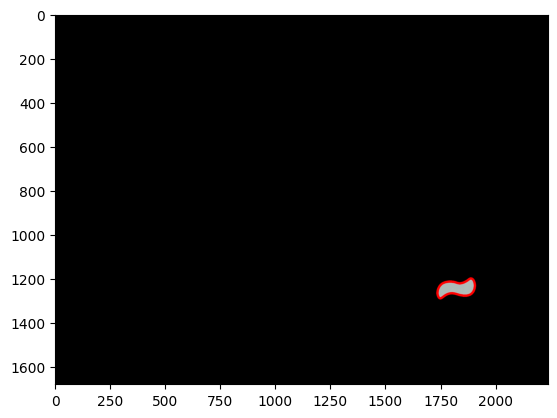

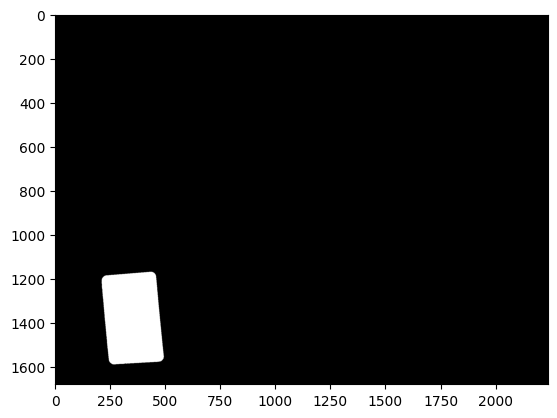

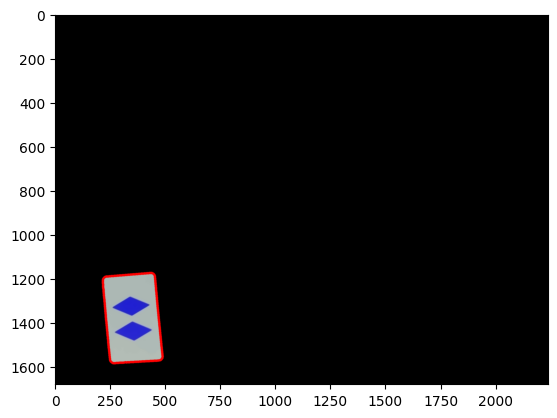

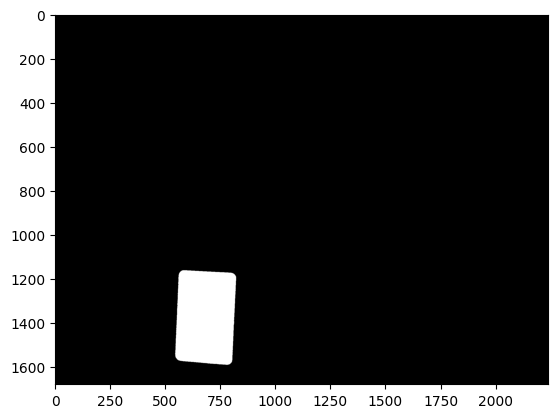

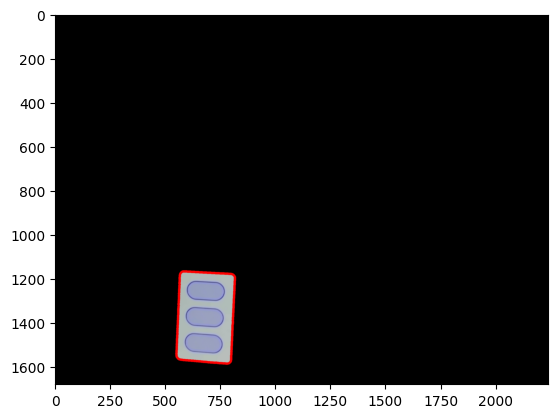

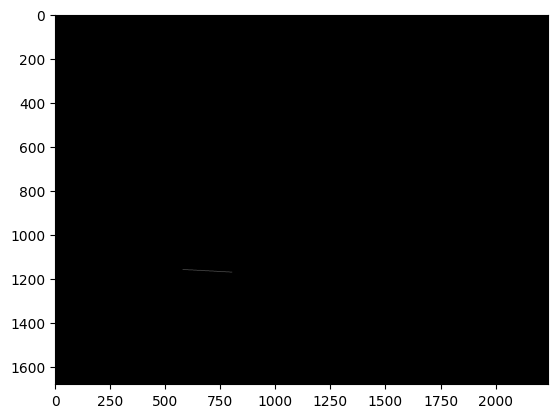

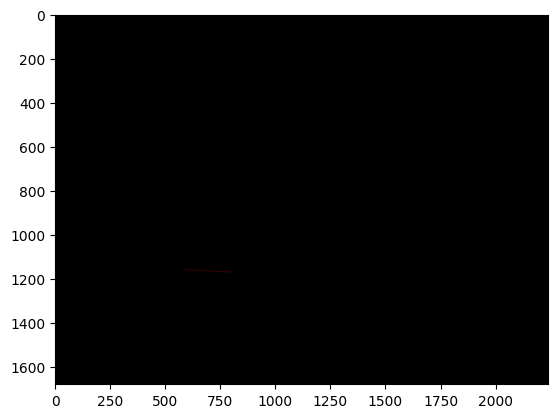

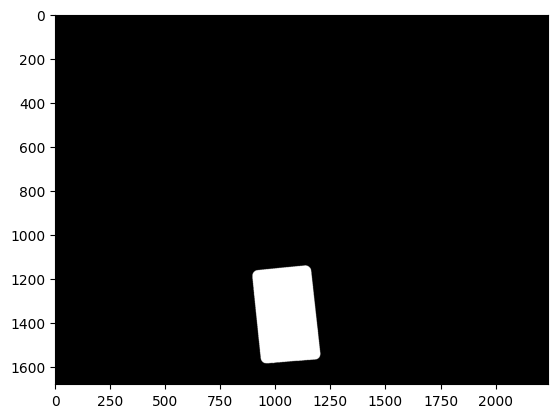

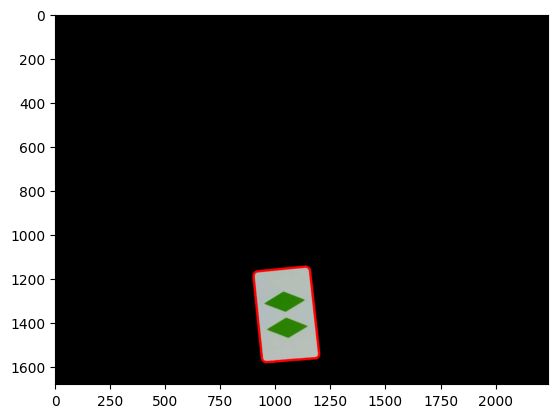

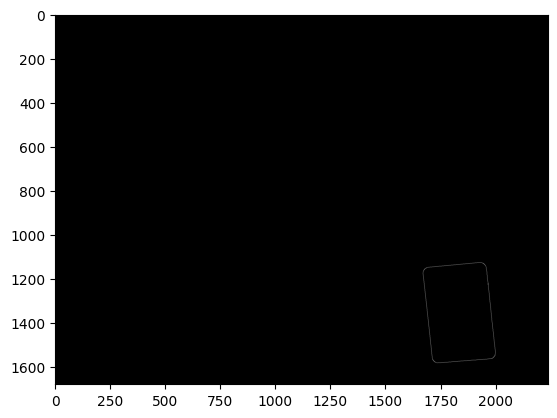

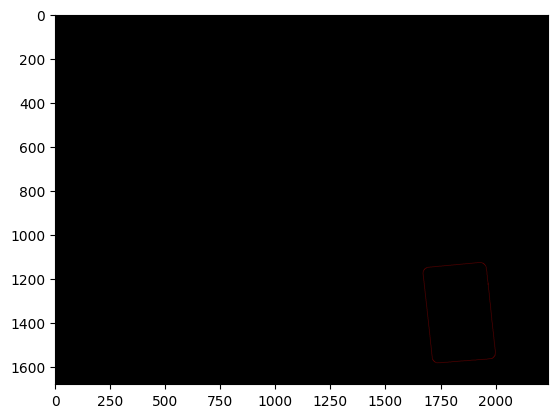

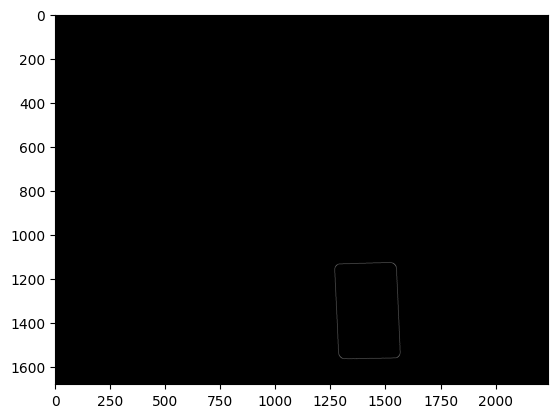

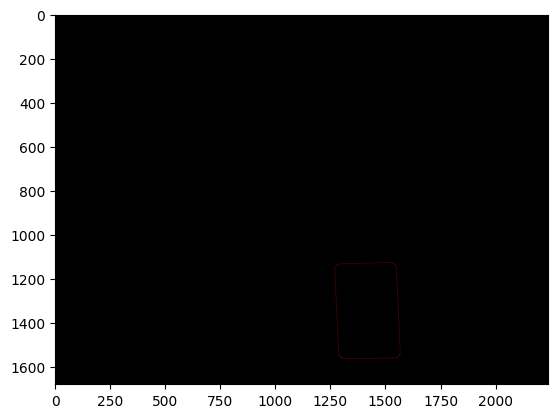

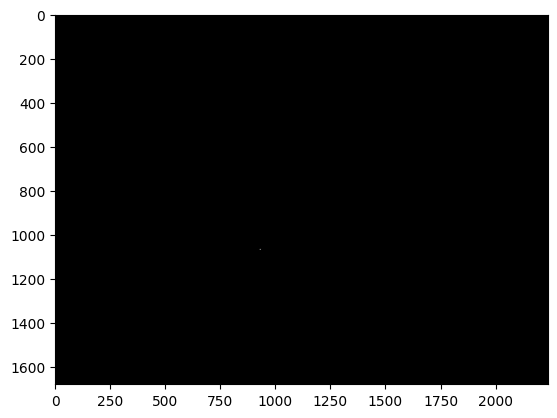

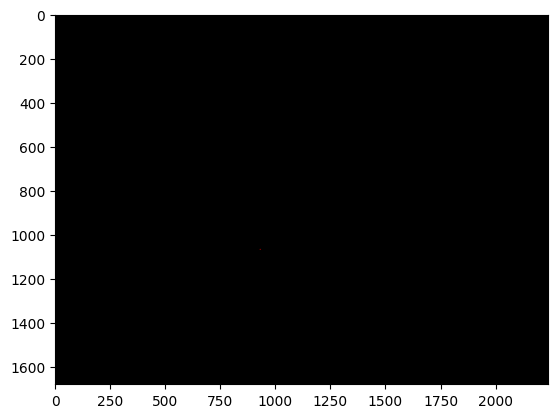

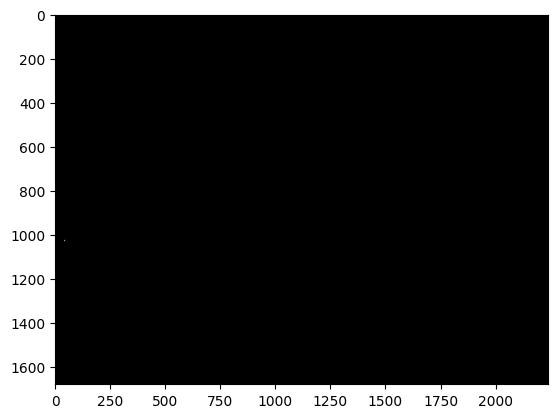

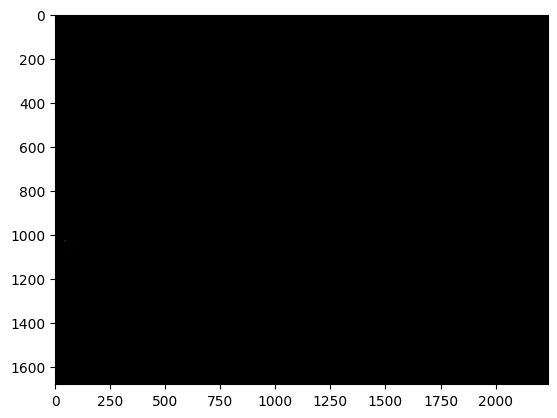

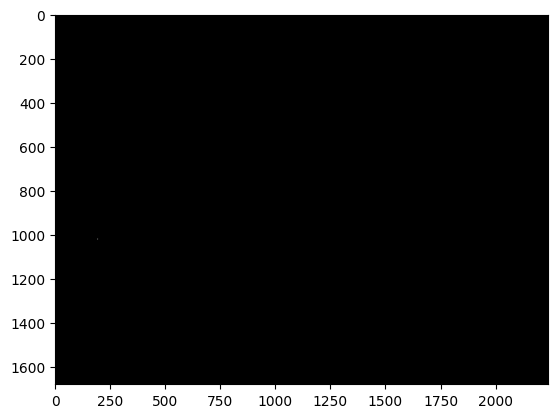

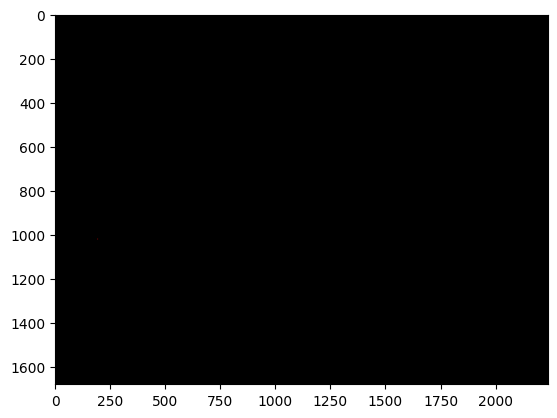

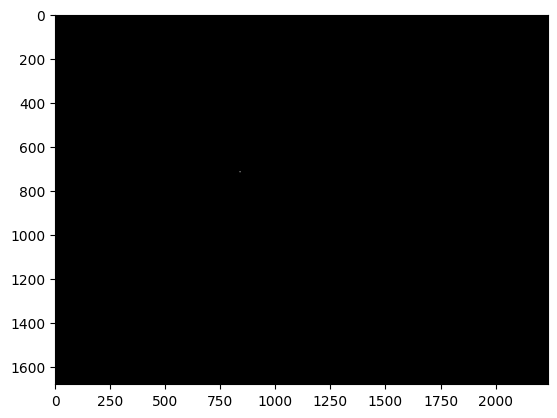

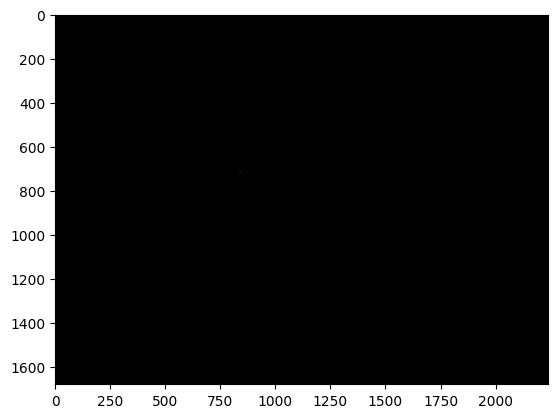

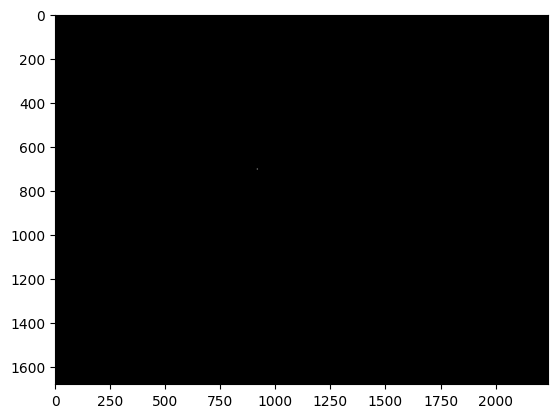

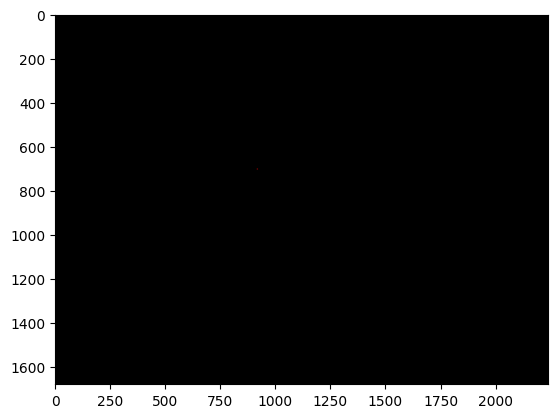

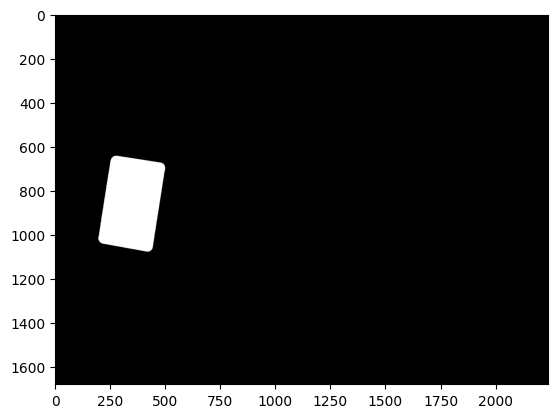

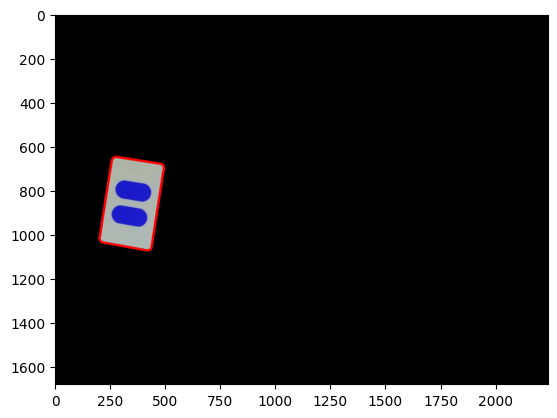

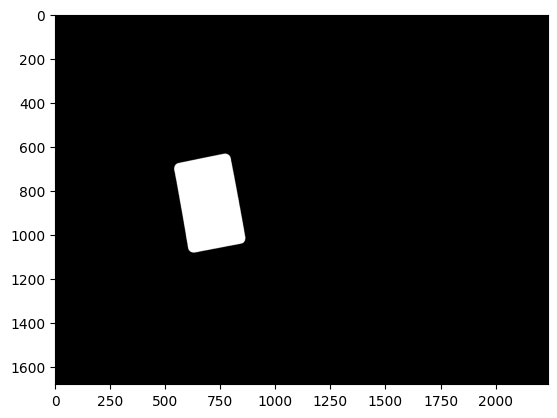

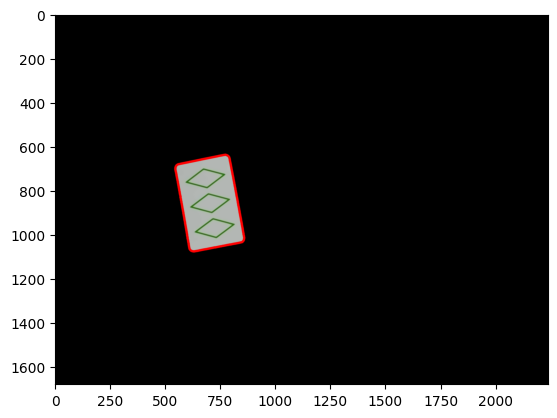

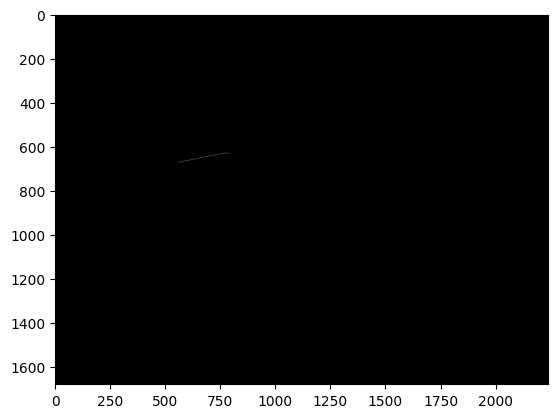

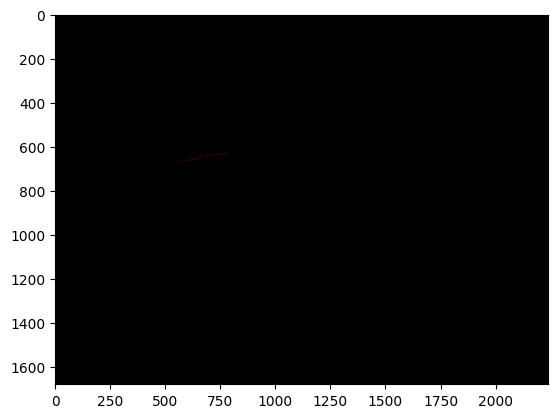

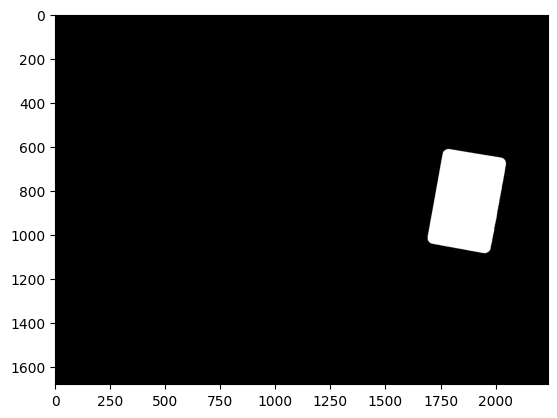

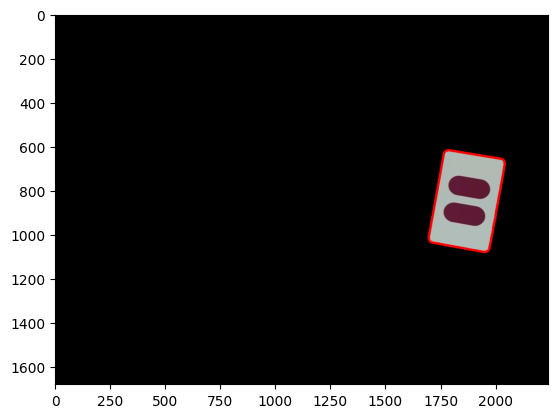

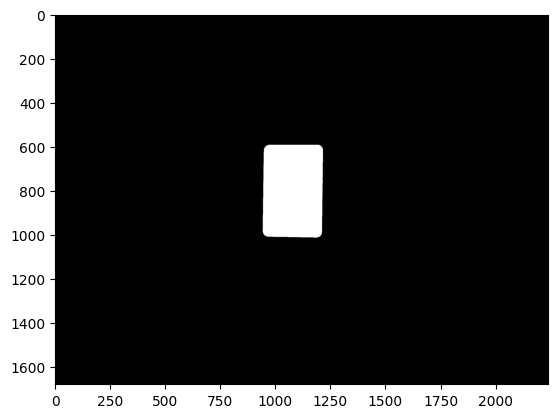

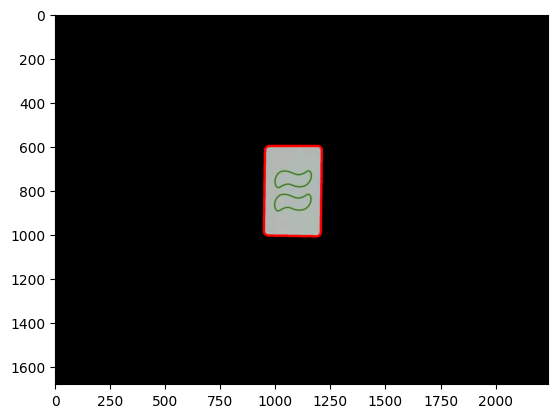

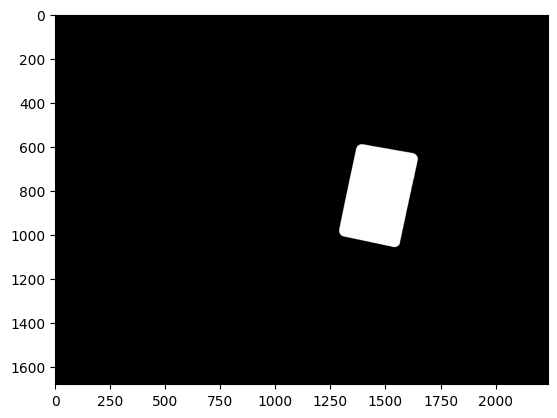

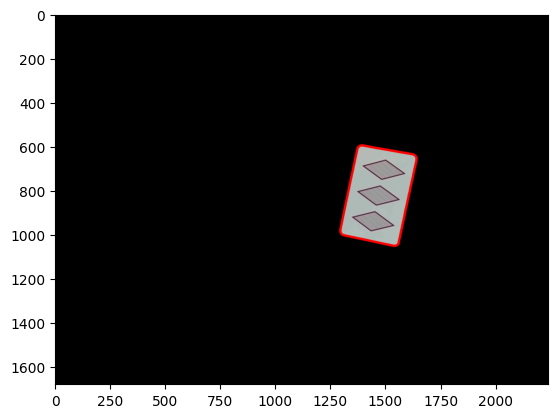

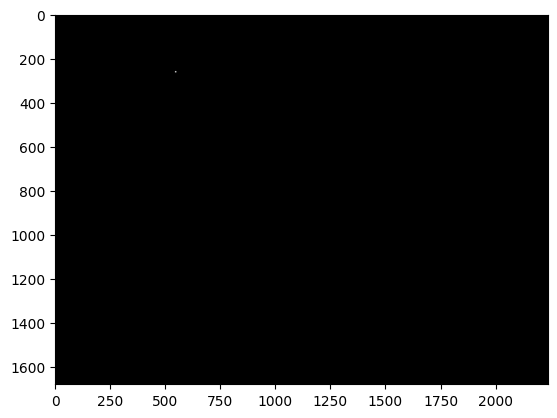

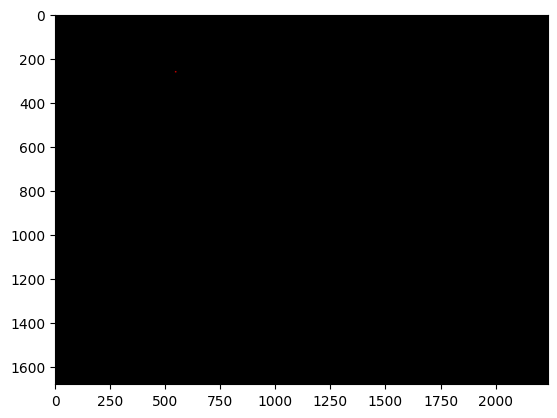

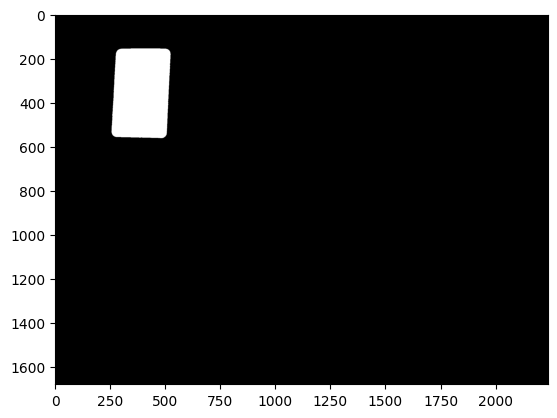

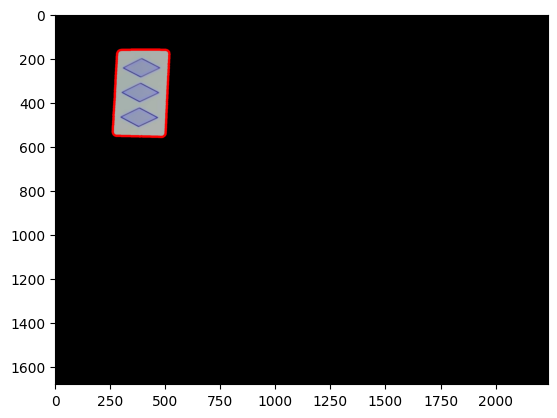

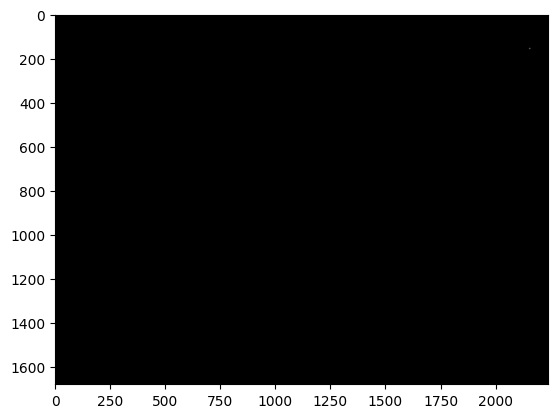

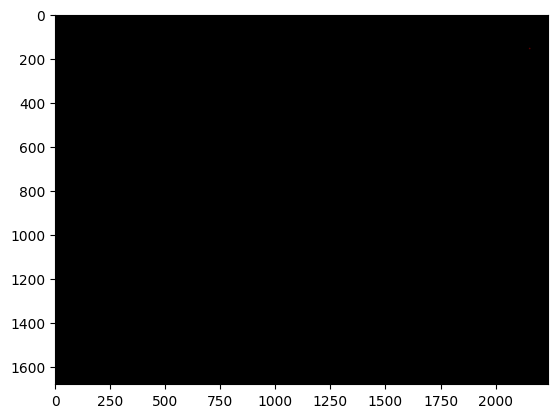

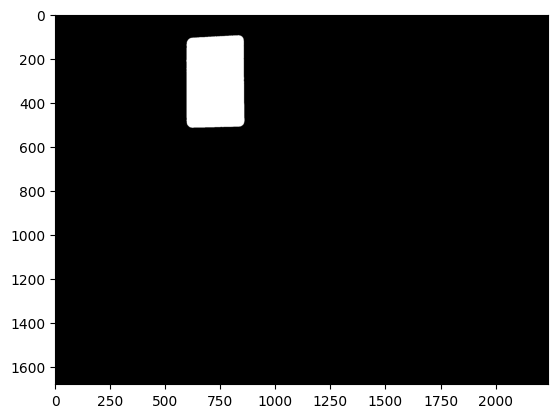

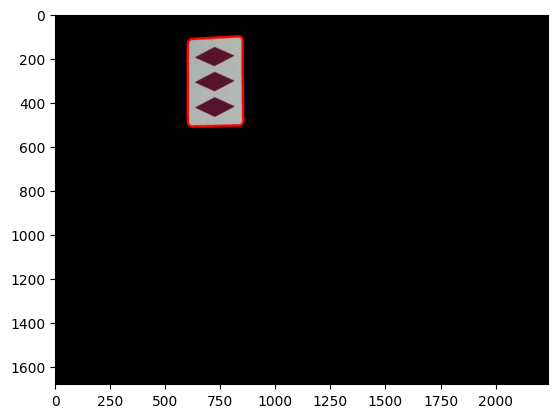

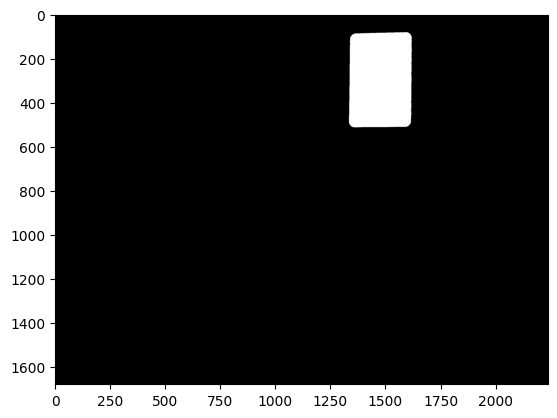

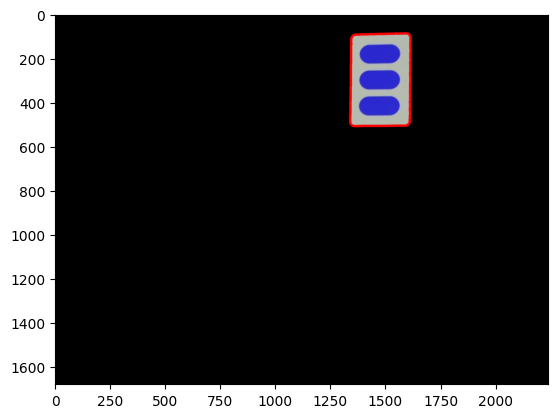

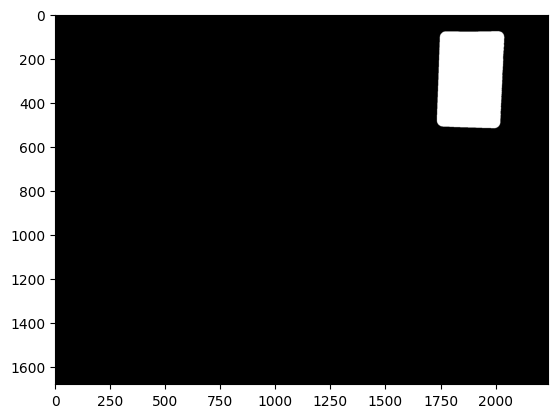

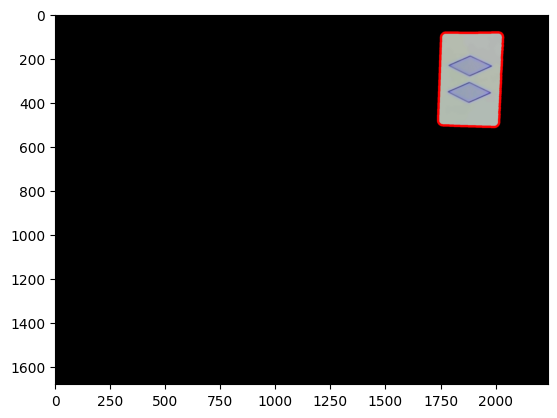

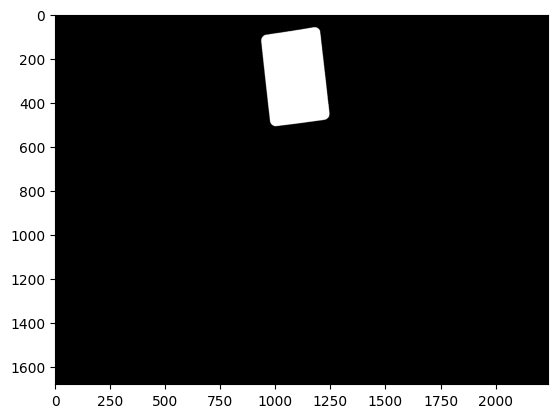

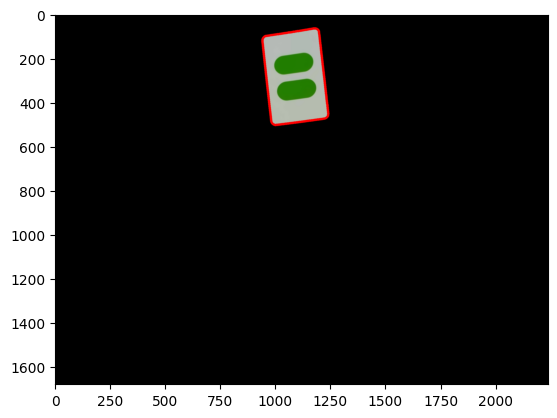

In [48]:
# Create Mask of contours
img = cv2.imread('cards/card1.jpg')
noiselessIMG = cv2.fastNlMeansDenoisingColored(img,None,20,20,7,21) 
gray = cv2.cvtColor(noiselessIMG, cv2.COLOR_BGR2GRAY)

#reduse noise
noiselessIMG=cv2.GaussianBlur(noiselessIMG,(3,3),100)

#convert to hsv
hsv = cv2.cvtColor(noiselessIMG, cv2.COLOR_BGR2RGB)

#image after hsv and denoising function
plt.imshow(hsv)
plt.show()

# Convert to grayscale
gray = cv2.cvtColor(noiselessIMG, cv2.COLOR_BGR2GRAY)

# Apply one shot filter
canny = cv2.Canny(gray, 2, 80)

# Show image after noise reduction and gray scale conversion
plt.imshow(canny, cmap='gray')
plt.show()

# Apply detection
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#draw contours on the original image
cv2.drawContours(noiselessIMG, contours,-1, 255, 20)

plt.imshow(noiselessIMG)
plt.show()

# Create masks
for contour in contours:
    # Create empty mask
    mask = np.zeros(noiselessIMG.shape[:2], np.uint8)
    # Draw contour on mask
    cv2.drawContours(mask, [contour],-1, 255, -1)
    # Show mask
    plt.imshow(mask, cmap='gray')
    plt.show()
    # Apply mask to image
    masked = cv2.bitwise_and(noiselessIMG, noiselessIMG, mask=mask)
    # Show image
    plt.imshow(masked)
    plt.show()